# Discrete Fourier Transform (DFT)

## Intro on waves

<img src="https://pythonnumericalmethods.berkeley.edu/_images/24.01.01-period_amplitude.jpg" width=50%>
<img src="https://pythonnumericalmethods.berkeley.edu/_images/24.01.02-wavelength_amplitude.jpg" width=50%>

The idea of Fourier transform:

The Fourier Transform can be used to decompose any signal into a sum of simple sine and cosine waves that we can easily measure the frequency, amplitude and phase. The Fourier transform can be applied to continuous or discrete waves, in this chapter, we will only talk about the Discrete Fourier Transform (DFT).

Using the DFT, we can compose the above signal to a series of sinusoids and each of them will have a different frequency. The following 3D figure shows the idea behind the DFT, that the above signal is actually the results of the sum of 3 different sine waves. The time domain signal, which is the above signal we saw can be transformed into a figure in the frequency domain called DFT amplitude spectrum, where the signal frequencies are showing as vertical bars. The height of the bar after normalization is the amplitude of the signal in the time domain. You can see that the 3 vertical bars are corresponding the 3 frequencies of the sine wave, which are also plotted in the figure.

<img src="https://pythonnumericalmethods.berkeley.edu/_images/24.02.02-time_frequency.png">

## DFT

The DFT can transform a sequence of evenly spaced signal to the information about the frequency of all the sine waves that needed to sum to the time domain signal. It is defined as:
$$X_k =\sum_0^{N-1} x_ne^{-i2\pi kn/N}=\sum_0^{N-1} x_n\left(\cos({2\pi kn/N})-i\sin({2\pi kn/N})\right)$$

where

$N$ = number of samples

$n$ = current sample

$k$ = current frequency, where $𝑘\in[0,𝑁−1]$

$𝑥_𝑛$ = the function value at sample n

$𝑋_𝑘$ = The DFT which include information of both amplitude and phase

Let $A_{k,n}=e^{-i2\pi kn/N}$, then we have 
$$X_k = \sum_{n=0}^{N-1}x_nA_{k,n}$$

Can be implement using:
```python
X = A@x
```

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('seaborn-poster')
print(plt.style.available)
%matplotlib inline

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


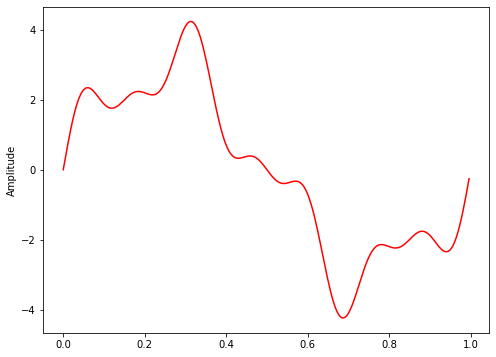

In [8]:
# sampling rate
sr = 256
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


In [24]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    # How do we implement? 
    N = len(x)
    n = np.array(range(N))
    k = np.array(range(N)).reshape([N,1])
    A = np.exp(-2j*np.pi*k*n/N)
    return A@x

C:\Users\016205356\AppData\Local\Temp\ipykernel_12664\1127404890.py:10: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")


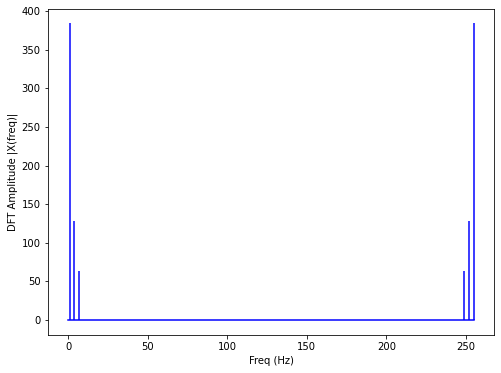

In [26]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

We can see from here that the output of the DFT is symmetric at half of the sampling rate (you can try different sampling rate to test). This half of the sampling rate is called Nyquist frequency or the folding frequency, it is named after the electronic engineer Harry Nyquist. He and Claude Shannon have the Nyquist-Shannon sampling theorem, which states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the highest frequency output from the DFT is half the sampling rate.

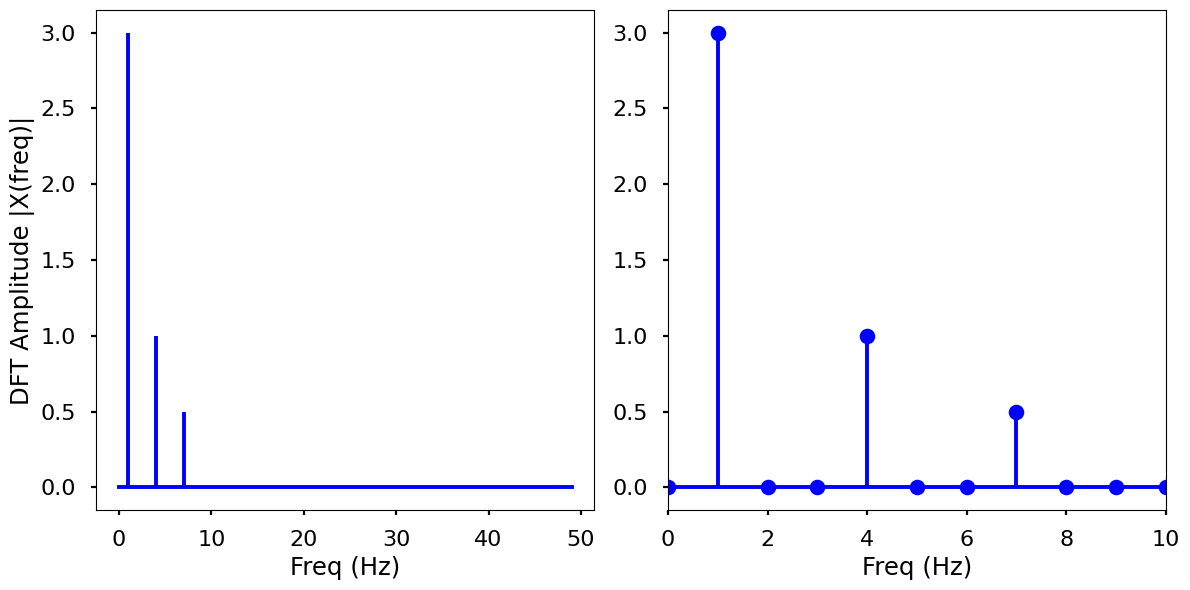

In [6]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


We can see by plotting the first half of the DFT results, we can see 3 clear peaks at frequency 1 Hz, 4 Hz, and 7 Hz, with amplitude 3, 1, 0.5 as expected. This is how we can use the DFT to analyze an arbitrary signal by decomposing it to simple sine waves.

## The inverse DFT

Of course, we can do the inverse transform of the DFT easily.
$$𝑥_𝑛=\dfrac{1}{𝑁}\sum_{𝑘=0}^{𝑁−1}𝑋_k𝑒^{𝑖2\pi 𝑘𝑛/𝑁}$$

We will leave this as an exercise for you to write a function.

In [19]:
def IDFT(X):
    """
    Function to calculate the inverse
    discrete Fourier Transform 
    of a 1D complex-valued signal X
    """

    # How do we implement? 
    
    return X

## FFT (Fast Fourier Transform)

\begin{align}
X_k &= \sum_{n=0}^{N-1}x_ne^{-i2\pi kn/N}\\
&= \sum_{m=0}^{N/2-1}x_{2m}e^{-i2\pi k(2m)/N}+ \sum_{n=0}^{N/2-1}x_{2m+1}e^{-i2\pi k(2m+1)/N}\\
&= \sum_{m=0}^{N/2-1}x_{2m}e^{-i2\pi km/(N/2)}+ e^{-i2\pi k/N}\sum_{n=0}^{N/2-1}x_{2m+1}e^{-i2\pi km/(N/2)}\\
\end{align}
Implementation is done recursively. 

In [23]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
        return X